# Pokemon
**Information about pokemon**

Pokémon is a role-playing game based around building a team made up of 6 monsters in order to win the highest number of battles. You can either battle other monsters in the wild which consist of random encounters with random pokemon or by battling a CPU or online players.

**Information about datasets** 

This project was built using 2 datasets. The first dataset included a list of all pokemon from generation 1 through 6 with their basic information. The second data set contains combat outcome between different pokemon.

**Questions I want to answer:**
1) What's the type of the most common pokemon?

2) Which pokemon type wins the most battles? What is it weakest against?

3) What's the best rounded pokemon?

4) What's the pokemon that wins the most? What type is it weakest against? What pokemon is it weakest against?

5) If I were up against a team of 6 pokemon, what's the likelihood of its composition? What team should I have?

6) If I were to play pokemon, which type of pokemon should I start with?

**Structure**
1) Explore data 

2) Transform data 

3) Answer the questions paired with visualizations

4) Results

**Libaries I will be using**

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

**1) explore data**


In [2]:
pokemon=pd.read_csv('pokemon.csv')
combat=pd.read_csv('combats.csv')

**Pokemon dataset**

In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [4]:
pd.value_counts(pokemon.dtypes)

int64     8
object    3
bool      1
dtype: int64

In [5]:
# Display all features
pokemon.sample(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
781,782,Pumpkaboo Small Size,Ghost,Grass,44,66,70,44,55,56,6,False
701,702,Virizion,Grass,Fighting,91,90,72,90,129,108,5,True
313,314,Slaking,Normal,NaN,150,160,100,95,65,100,3,False
427,428,Jirachi,Steel,Psychic,100,100,100,100,100,100,3,True
597,598,Seismitoad,Water,Ground,105,95,75,85,75,74,5,False


In [6]:
# Display non-numerical features to see if theres any numerical feature as non-numerical
pokemon.select_dtypes(exclude="number").sample(5)

,Name,Type 1,Type 2,Legendary
264,Suicune,Water,NaN,True
295,Ludicolo,Water,Grass,False
18,Beedrill,Bug,Poison,False
210,Quagsire,Water,Ground,False
446,Kricketot,Bug,NaN,False


In [7]:
# All non-numerical features are properly marked, no errors here

In [8]:
# Macro summary of non-numerical features
pokemon.describe(exclude="number")

,Name,Type 1,Type 2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Bulbasaur,Water,Flying,False
freq,1,112,97,735


In [9]:
# Macro summary of numerical features
# pokemon.describe(include="number", percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


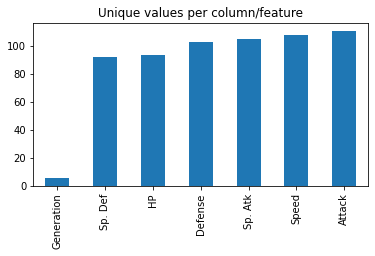

In [10]:
# Number of unique values per column/feature for numerical data types
unique_values=pokemon.drop(["#"],axis=1).select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(figsize=(6,3), title="Unique values per column/feature")
plt.show()

In [11]:
# Detecting duplicates
n_duplicates=pokemon.drop(["#"],axis=1).duplicated().sum()
print("The pokemon dataset has "+str(n_duplicates)+" duplicates")

The pokemon dataset has 0 duplicates


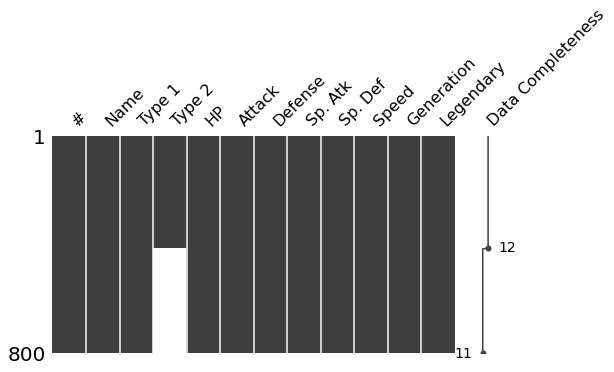

In [12]:
# Detecting missing values in data set
# plt.figure(figsize=(5, 5))
# plt.imshow(pokemon.isna(), aspect="auto", interpolation="nearest", cmap="gray")
# plt.xlabel("Column Number")
# plt.ylabel("Sample Number")

# Shorter way to visualize missing values
msno.matrix(pokemon, labels=True, sort="descending",figsize=(8, 4))
plt.show()

In [13]:
# percentage of missing values in each column
pokemon.isna().mean()

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

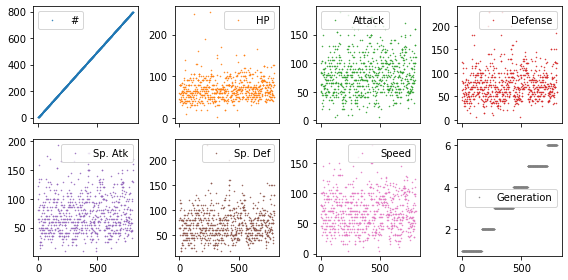

In [14]:
pokemon.plot(lw=0, marker=".", subplots=True, layout=(2, 4), figsize=(8, 4), markersize=1)
plt.tight_layout()
plt.show()

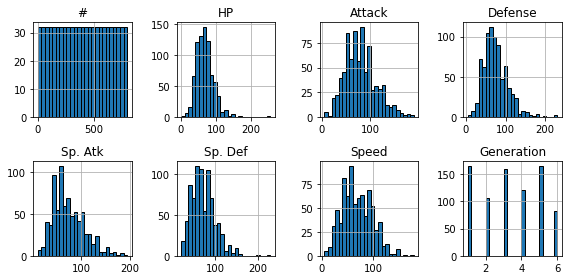

In [15]:
pokemon.hist(bins=25, figsize=(8, 4), layout=(-1, 4), edgecolor="black")
plt.tight_layout()
plt.show()

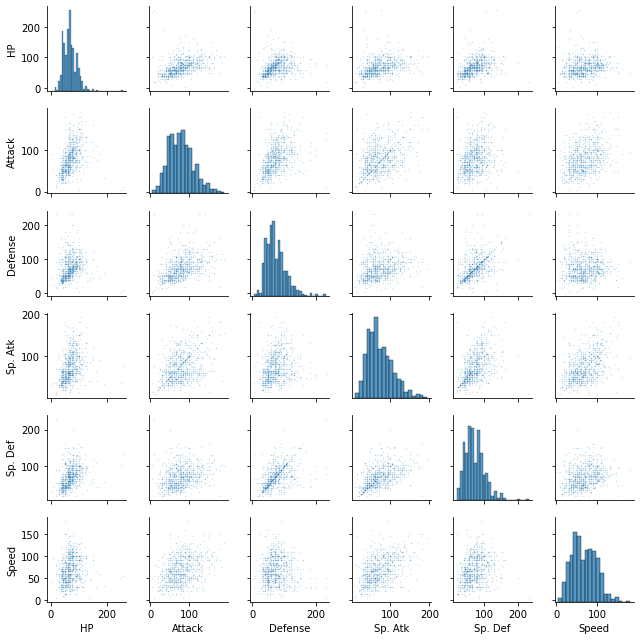

In [16]:
sns.pairplot(pokemon.drop(["#","Legendary", "Generation"], axis=1), height=1.5,plot_kws={"s": 2, "alpha": 0.2})
plt.tight_layout()
plt.show()

In [17]:
pokemon_corr=pokemon.drop(["#","Generation","Legendary"],axis=1).corr()
pokemon_corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


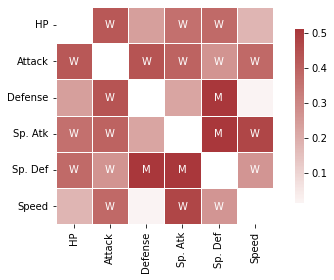

In [18]:
# Create labels for the correlation matrix
labels = np.where(np.abs(pokemon_corr)>0.75, "S",
                  np.where(np.abs(pokemon_corr)>0.5, "M",
                           np.where(np.abs(pokemon_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(pokemon_corr, mask=np.eye(len(pokemon_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

**Combat dataset**

In [19]:
combat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [21]:
combat.sample(5)

,First_pokemon,Second_pokemon,Winner
33840,351,557,557
44628,351,324,351
32325,85,456,85
10646,402,278,278
12796,231,56,56


**2) Transform data**

**Modify datasets in order to be able to answers the questions asked**

In [22]:
# Modify combat data set to include types
combat=combat.merge(pokemon[["#","Type 1"]], left_on="First_pokemon", right_on="#", how="left").drop(columns="#").rename(columns={"Type 1":"First_pokemon_type"})

In [23]:
combat=combat.merge(pokemon[["#","Type 1"]], left_on="Second_pokemon", right_on="#", how="left").drop(columns="#").rename(columns={"Type 1":"Second_pokemon_type"})

In [24]:
combat=combat.merge(pokemon[["#","Type 1"]], left_on="Winner", right_on="#", how="left").drop(columns="#").rename(columns={"Type 1":"Winner_pokemon_type"})

In [25]:
# Combat data set has initial changes with combat information and types
print(combat.shape)
combat.head(5)

(50000, 6)


,First_pokemon,Second_pokemon,Winner,First_pokemon_type,Second_pokemon_type,Winner_pokemon_type
0,266,298,298,Rock,Grass,Grass
1,702,701,701,Grass,Rock,Rock
2,191,668,668,Fairy,Psychic,Psychic
3,237,683,683,Fire,Dragon,Dragon
4,151,231,151,Rock,Bug,Rock


In [26]:
# Check if merge was done correctly
display(pokemon.head(2))
combat.loc[(combat["First_pokemon"]==1)|(combat["Second_pokemon"]==1)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False


,First_pokemon,Second_pokemon,Winner,First_pokemon_type,Second_pokemon_type,Winner_pokemon_type
426,1,679,679,Grass,Bug,Bug
442,732,1,732,Fire,Grass,Fire
480,441,1,441,Water,Grass,Water
995,1,687,687,Grass,Dark,Dark
1040,1,557,557,Grass,Grass,Grass
...,...,...,...,...,...,...
48539,733,1,1,Bug,Grass,Grass
48696,1,217,217,Grass,Psychic,Psychic
48716,1,346,1,Grass,Poison,Grass
48741,522,1,522,Grass,Grass,Grass


In [27]:
# Verifying if combat information has duplicates
# combat.duplicated()
print(str(combat.duplicated().sum())+" duplicates will remain in order to simulate real battle scenarios")

1952 duplicates will remain in order to simulate real battle scenarios


In [28]:
# All battles that any pokemon fought
all_battles=pd.concat([combat["First_pokemon"],combat["Second_pokemon"]],ignore_index=True).to_frame(name="all_pokemon_battles")
all_battles=all_battles.groupby(by=["all_pokemon_battles"]).agg({"all_pokemon_battles":"count"}).rename(columns={"all_pokemon_battles":"battles_fought"})
all_battles=all_battles.rename_axis("pokemon_id")
all_battles

,battles_fought
pokemon_id,
1,133
2,121
3,132
4,125
5,112
...,...
796,105
797,131
798,119


In [29]:
# All battles that any pokemon won
winner_battles=combat.groupby(by=["Winner"]).agg({"Winner":"count"}).rename(columns={"Winner":"winner_of_battles"})
winner_battles=winner_battles.rename_axis("pokemon_id")
winner_battles

,winner_of_battles
pokemon_id,
1,37
2,46
3,89
4,70
5,55
...,...
796,39
797,116
798,60


In [30]:
# Join both df to obtain winner percentage
pokemon_w_perc=all_battles.merge(winner_battles, on="pokemon_id", how="outer")
pokemon_w_perc["winning_percentage"]=pokemon_w_perc["winner_of_battles"]/pokemon_w_perc["battles_fought"]
pokemon_w_perc

,battles_fought,winner_of_battles,winning_percentage
pokemon_id,,,
1,133,37.0,0.278195
2,121,46.0,0.380165
3,132,89.0,0.674242
4,125,70.0,0.560000
5,112,55.0,0.491071
...,...,...,...
796,105,39.0,0.371429
797,131,116.0,0.885496
798,119,60.0,0.504202


In [31]:
# Merge data sets to obtain pokemon winning percentage
pokemon_adj=pokemon.copy().merge(pokemon_w_perc, left_on="#", right_on="pokemon_id", how="left")

In [32]:
# Check data set for pokemon with missing information
pokemon_adj.loc[pokemon_adj.isna()["winning_percentage"]==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,battles_fought,winner_of_battles,winning_percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,135.0,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN


In [33]:
# Drop all na that didnt fight in any battles
pokemon_adj=pokemon_adj.dropna(subset=["battles_fought"])
pokemon_adj.loc[pokemon_adj.isna()["winning_percentage"]==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,battles_fought,winner_of_battles,winning_percentage
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,135.0,NaN,NaN


In [34]:
# Replace na values with proper one, in this case 0
pokemon_adj=pokemon_adj.fillna({"winner_of_battles":0,"winning_percentage":0})
print(pokemon_adj.isna().mean())
print(pokemon_adj.shape)

#                     0.000000
Name                  0.000000
Type 1                0.000000
Type 2                0.482143
HP                    0.000000
Attack                0.000000
Defense               0.000000
Sp. Atk               0.000000
Sp. Def               0.000000
Speed                 0.000000
Generation            0.000000
Legendary             0.000000
battles_fought        0.000000
winner_of_battles     0.000000
winning_percentage    0.000000
dtype: float64
(784, 15)


In [35]:
# Correlation to see if theres any relationship between variables
pokemon_adj_corr=pokemon_adj.drop(columns=["#","Generation","Legendary","battles_fought","winner_of_battles"]).corr()
pokemon_adj_corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,winning_percentage
HP,1.000000,0.420464,0.248069,0.366261,0.385570,0.183813,0.261602
Attack,0.420464,1.000000,0.442344,0.398339,0.265884,0.385933,0.502825
Defense,0.248069,0.442344,1.000000,0.221042,0.508399,0.011475,0.114565
Sp. Atk,0.366261,0.398339,0.221042,1.000000,0.503077,0.473344,0.481445
Sp. Def,0.385570,0.265884,0.508399,0.503077,1.000000,0.254372,0.302422
Speed,0.183813,0.385933,0.011475,0.473344,0.254372,1.000000,0.938055
winning_percentage,0.261602,0.502825,0.114565,0.481445,0.302422,0.938055,1.000000


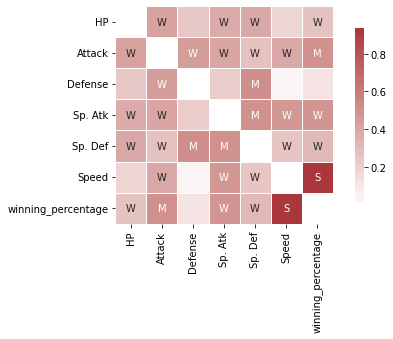

In [36]:
# Create labels for the correlation matrix
labels = np.where(np.abs(pokemon_adj_corr)>0.75, "S",
                  np.where(np.abs(pokemon_adj_corr)>0.5, "M",
                           np.where(np.abs(pokemon_adj_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(pokemon_adj_corr, mask=np.eye(len(pokemon_adj_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [37]:
# Winning percentage per type
# For pandas dark vs. bug and bug vs.dark are two different things. For the purpose of the analisis we need it to be the same.
# Use this df as a base for the df that we want to build
type_battle_outcome=combat.groupby(by=["First_pokemon_type","Second_pokemon_type","Winner_pokemon_type"], 
                                   as_index=False).agg({"First_pokemon":"count"}).rename(columns={"First_pokemon":"winner_of_battles"})
type_battle_outcome

,First_pokemon_type,Second_pokemon_type,Winner_pokemon_type,winner_of_battles
0,Bug,Bug,Bug,386
1,Bug,Dark,Bug,65
2,Bug,Dark,Dark,101
3,Bug,Dragon,Bug,47
4,Bug,Dragon,Dragon,119
...,...,...,...,...
614,Water,Rock,Rock,164
615,Water,Rock,Water,200
616,Water,Steel,Steel,105
617,Water,Steel,Water,129


In [38]:
# Building df that count type fighting scenario independently if type is in column "First_pokemon_type" or "Second_pokemon_type"
type_pokemon_combat_outcomes={"type_first_pokemon":[],"type_second_pokemon":[],"type_battles_won":[],"type_battles_fought":[]}
pokemon_types=np.unique(pokemon["Type 1"]).tolist()
x=0
y=0
for a in pokemon_types:
    for b in pokemon_types:
        if a==b:
            for index in type_battle_outcome.loc[(type_battle_outcome["First_pokemon_type"]==a
                                                 )&(type_battle_outcome["Second_pokemon_type"]==a)].index:
                x=x+type_battle_outcome["winner_of_battles"][index]
                y=y+type_battle_outcome["winner_of_battles"][index]
        else:
            for index in type_battle_outcome.loc[((type_battle_outcome["First_pokemon_type"]==a)|(type_battle_outcome["Second_pokemon_type"]==a))&
       ((type_battle_outcome["First_pokemon_type"]==b)|(type_battle_outcome["Second_pokemon_type"]==b))].index:
                x=x+type_battle_outcome["winner_of_battles"][index]
                if type_battle_outcome["Winner_pokemon_type"][index]==a:
                    y=y+type_battle_outcome["winner_of_battles"][index]
        type_pokemon_combat_outcomes["type_first_pokemon"].append(a)
        type_pokemon_combat_outcomes["type_second_pokemon"].append(b)
        type_pokemon_combat_outcomes["type_battles_won"].append(y)
        type_pokemon_combat_outcomes["type_battles_fought"].append(x)
        x=0
        y=0

In [39]:
type_combat_outcome=pd.DataFrame(type_pokemon_combat_outcomes)
type_combat_outcome["type_winning_percentage"]=(type_combat_outcome["type_battles_won"]/type_combat_outcome["type_battles_fought"])
type_combat_outcome

,type_first_pokemon,type_second_pokemon,type_battles_won,type_battles_fought,type_winning_percentage
0,Bug,Bug,386,386,1.000000
1,Bug,Dark,112,309,0.362460
2,Bug,Dragon,97,342,0.283626
3,Bug,Electric,126,473,0.266385
4,Bug,Fairy,116,190,0.610526
...,...,...,...,...,...
319,Water,Poison,283,518,0.546332
320,Water,Psychic,417,1086,0.383978
321,Water,Rock,448,759,0.590250
322,Water,Steel,307,497,0.617706


**3) Answer the questions paired with visualizations**

In [40]:
# Answer 1) What's the type of the most common pokemon
common_pokemon=pokemon.groupby(by=['Type 1'],as_index=False).agg({'#':'count'}).rename(columns={'#':'total_of_type'})
common_pokemon['total_pokemon']=common_pokemon['total_of_type'].sum()
common_pokemon['likeliness_encounter']=common_pokemon['total_of_type']/common_pokemon['total_pokemon']
common_pokemon=common_pokemon.sort_values(by=['likeliness_encounter'], ascending=False)
common_pokemon

,Type 1,total_of_type,total_pokemon,likeliness_encounter
17,Water,112,800,0.14000
12,Normal,98,800,0.12250
9,Grass,70,800,0.08750
0,Bug,69,800,0.08625
14,Psychic,57,800,0.07125
6,Fire,52,800,0.06500
3,Electric,44,800,0.05500
15,Rock,44,800,0.05500
8,Ghost,32,800,0.04000
10,Ground,32,800,0.04000


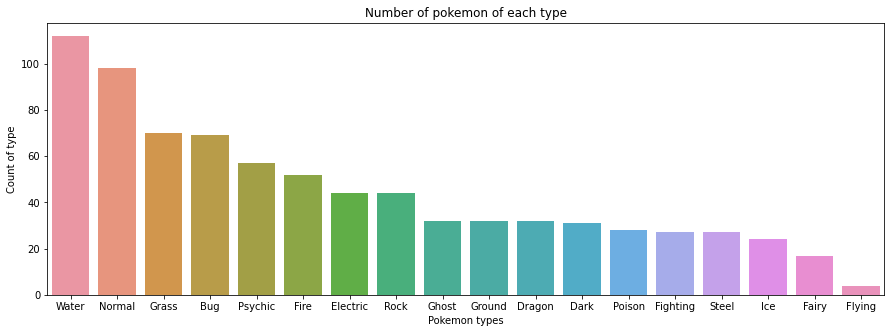

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Number of pokemon of each type')
sns.barplot(data=common_pokemon, x='Type 1' ,y='total_of_type')
ax.set_xlabel('Pokemon types')
ax.set_ylabel('Count of type')
plt.show()

In [42]:
# Looking at the flying pokemon, due to their low number and 50% of all flying being legendary flying types will be
# excluded from following answers
pokemon.loc[pokemon['Type 1']=='Flying']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
702,703,Tornadus Incarnate Forme,Flying,NaN,79,115,70,125,80,111,5,True
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True
790,791,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False
791,792,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False


In [43]:
# Answer 2.1) Which pokemon type wins the most battles?
expected_win_perc=type_combat_outcome.merge(common_pokemon[['Type 1','likeliness_encounter']]
                          ,how='left', left_on='type_second_pokemon', right_on='Type 1').drop(columns=['Type 1'])
expected_win_perc['weight_value']=expected_win_perc['type_winning_percentage']*expected_win_perc['likeliness_encounter']
w_type_expectedvalue=expected_win_perc.groupby(by=['type_first_pokemon'],as_index=False).agg({'weight_value':'sum'}).rename(
columns={'weight_value':'expected_winning_percentage'})

w_type_expectedvalue=w_type_expectedvalue.merge(common_pokemon[['Type 1','total_of_type']]
                          ,how='left', left_on='type_first_pokemon', right_on='Type 1').drop(columns=['Type 1']).sort_values(
by=['expected_winning_percentage'],ascending=False)

w_type_expectedvalue

,type_first_pokemon,expected_winning_percentage,total_of_type
7,Flying,0.758769,4
3,Electric,0.655341,44
1,Dark,0.653198,31
2,Dragon,0.650253,32
6,Fire,0.611615,52
12,Normal,0.600296,98
14,Psychic,0.581486,57
10,Ground,0.554725,32
17,Water,0.537384,112
8,Ghost,0.499204,32


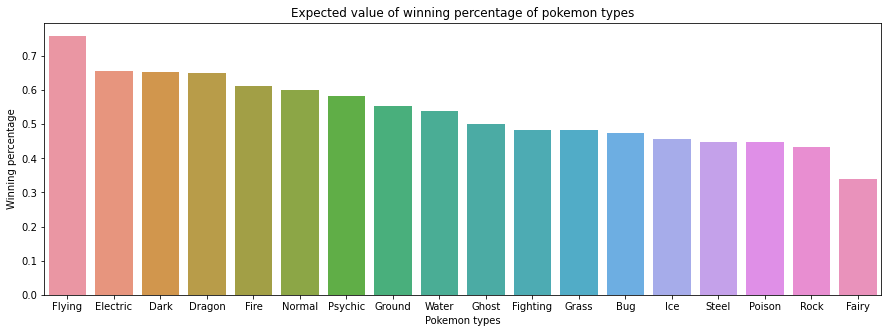

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Expected value of winning percentage of pokemon types')
sns.barplot(data=w_type_expectedvalue, x='type_first_pokemon',y='expected_winning_percentage')
ax.set_xlabel('Pokemon types')
ax.set_ylabel('Winning percentage')
plt.show()

In [45]:
# Answer 2.2) What is it the weakest against?
type_combat_outcome.loc[type_combat_outcome['type_first_pokemon']=='Flying'].sort_values(
by=['type_winning_percentage'],ascending=True)

,type_first_pokemon,type_second_pokemon,type_battles_won,type_battles_fought,type_winning_percentage
140,Flying,Psychic,21,35,0.600000
141,Flying,Rock,16,24,0.666667
129,Flying,Electric,11,16,0.687500
138,Flying,Normal,44,61,0.721311
132,Flying,Fire,21,29,0.724138
130,Flying,Fairy,8,11,0.727273
127,Flying,Dark,17,23,0.739130
135,Flying,Grass,27,36,0.750000
143,Flying,Water,52,68,0.764706
126,Flying,Bug,30,38,0.789474


In [46]:
# Its not likely you will be having one flying pokemon due to their scarecity
# Doing analisis with the type that ranked in second place
electric_against_types=type_combat_outcome.loc[type_combat_outcome['type_first_pokemon']=='Electric'].sort_values(
by=['type_winning_percentage'],ascending=True)
electric_against_types

,type_first_pokemon,type_second_pokemon,type_battles_won,type_battles_fought,type_winning_percentage
64,Electric,Ground,21,218,0.096330
61,Electric,Flying,5,16,0.312500
56,Electric,Dragon,81,178,0.455056
55,Electric,Dark,116,210,0.552381
68,Electric,Psychic,239,422,0.566351
60,Electric,Fire,196,327,0.599388
66,Electric,Normal,418,676,0.618343
63,Electric,Grass,306,459,0.666667
59,Electric,Fighting,123,179,0.687151
71,Electric,Water,498,713,0.698457


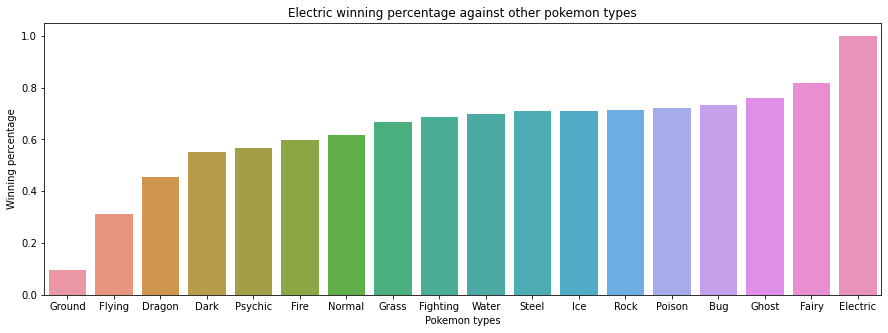

In [47]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Electric winning percentage against other pokemon types')
sns.barplot(data=electric_against_types, x='type_second_pokemon',y='type_winning_percentage')
ax.set_xlabel('Pokemon types')
ax.set_ylabel('Winning percentage')
plt.show()

In [48]:
# Answer 3) What's the best rounded pokemon
pokemon_adj.drop(columns=['#','Generation','Legendary','battles_fought','winner_of_battles']).corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,winning_percentage
HP,1.000000,0.420464,0.248069,0.366261,0.385570,0.183813,0.261602
Attack,0.420464,1.000000,0.442344,0.398339,0.265884,0.385933,0.502825
Defense,0.248069,0.442344,1.000000,0.221042,0.508399,0.011475,0.114565
Sp. Atk,0.366261,0.398339,0.221042,1.000000,0.503077,0.473344,0.481445
Sp. Def,0.385570,0.265884,0.508399,0.503077,1.000000,0.254372,0.302422
Speed,0.183813,0.385933,0.011475,0.473344,0.254372,1.000000,0.938055
winning_percentage,0.261602,0.502825,0.114565,0.481445,0.302422,0.938055,1.000000


In [49]:
# Correlation of speed and winning is close to perfecta, implying that speed is likely the most important atribute to win battles
# Adding speed ranking to pokemon to see if highest winning percentage pokemon are also y the top percentile of speed atributes
# Exclude legendary because players arent likely to wonder upon a legendary at the star of a game
pokemon_adj['Speed Ranking']=pokemon_adj['Speed'].rank(ascending=False, method='min')
pokemon_adj['Winning Percent Ranking']=pokemon_adj['winning_percentage'].rank(ascending=False)
top_10=pokemon_adj.sort_values(by=['winning_percentage'],ascending=False)
# top_10.loc[top_10['Legendary']==False].iloc[0:9,:]
top_10.iloc[0:9,:]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,battles_fought,winner_of_battles,winning_percentage,Speed Ranking,Winning Percent Ranking
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,129.0,127.0,0.984496,3.0,1.0
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,119.0,116.0,0.974790,23.0,2.0
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,125.0,121.0,0.968000,28.0,3.0
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,119.0,115.0,0.966387,7.0,4.0
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,141.0,136.0,0.964539,14.0,5.0
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,129.0,124.0,0.961240,12.0,6.0
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,127.0,122.0,0.960630,27.0,7.0
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,123.0,118.0,0.959350,20.0,8.0
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,125.0,119.0,0.952000,10.0,9.0


In [50]:
# Observed that excluding legendary all of the top pokemon that appear on are mega evolutions which you cannot capture in the 
# game but can acheive upon capturaing pokemon that preceds it
# since you cannot capture mega evolutions created a column to exclude this pokemons for analisis of best rounded pokemon
pokemon_adj['Mega Evolution']=pokemon_adj['Name'].apply(lambda x: 'Mega' in x)
pokemon_adj.loc[pokemon_adj['Mega Evolution']==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,battles_fought,winner_of_battles,winning_percentage,Speed Ranking,Winning Percent Ranking,Mega Evolution
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,125.0,70.0,0.560000,261.0,329.5,True
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,139.0,119.0,0.856115,106.0,92.0,True
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,135.0,114.0,0.844444,106.0,103.5,True
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,144.0,83.0,0.576389,295.0,312.0,True
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,119.0,115.0,0.966387,7.0,4.0,True
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False,126.0,119.0,0.944444,28.0,13.5,True
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,1,False,110.0,86.0,0.781818,3.0,150.0,True
87,88,Mega Slowbro,Water,Psychic,95,75,180,130,80,30,1,False,116.0,16.0,0.137931,698.0,730.0,True
102,103,Mega Gengar,Ghost,Poison,60,65,80,170,95,130,1,False,131.0,113.0,0.862595,14.0,82.5,True
124,125,Mega Kangaskhan,Normal,NaN,105,125,100,60,100,100,1,False,128.0,107.0,0.835938,106.0,109.0,True


In [51]:
# Created column that caputeres whether a pokemon is legenday or a Mega Evolution for latter analisis
pokemon_adj['Legendary or Mega Evolution']=np.logical_or(pokemon_adj['Legendary'],pokemon_adj['Mega Evolution'])
top_10=pokemon_adj.sort_values(by=['winning_percentage'],ascending=False)

In [52]:
# Results of pokemon that win the most excluding legendary and mega evolutions
display(top_10.loc[top_10['Legendary or Mega Evolution']==False].iloc[0:10,:])
pokemon_adj.describe(percentiles=[0.9,0.95])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,battles_fought,winner_of_battles,winning_percentage,Speed Ranking,Winning Percent Ranking,Mega Evolution,Legendary or Mega Evolution
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,119.0,116.0,0.974790,23.0,2.0,False,False
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,141.0,136.0,0.964539,14.0,5.0,False,False
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,127.0,122.0,0.960630,27.0,7.0,False,False
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,123.0,118.0,0.959350,20.0,8.0,False,False
233,234,Sneasel,Dark,Ice,55,95,55,35,75,115,2,False,113.0,106.0,0.938053,38.0,19.0,False,False
582,583,Zebstrika,Electric,NaN,75,100,63,80,63,116,5,False,107.0,100.0,0.934579,36.0,21.0,False,False
480,481,Purugly,Normal,NaN,71,82,64,64,59,112,4,False,119.0,111.0,0.932773,51.0,24.0,False,False
791,792,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False,115.0,107.0,0.930435,26.0,25.0,False,False
605,606,Scolipede,Bug,Poison,60,100,89,55,69,112,5,False,114.0,106.0,0.929825,51.0,26.0,False,False
183,184,Crobat,Poison,Flying,85,90,80,70,80,130,2,False,122.0,113.0,0.926230,14.0,28.5,False,False


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,battles_fought,winner_of_battles,winning_percentage,Speed Ranking,Winning Percent Ranking
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,402.654337,69.077806,78.919643,73.899235,72.758929,71.951531,68.362245,3.338010,127.551020,63.775510,0.500899,382.146684,392.500000
std,230.232187,25.393311,32.575170,31.360815,32.729033,27.811906,29.227411,1.656069,11.393236,32.983848,0.255459,225.097975,226.465428
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,92.000000,0.000000,0.000000,1.000000,1.000000
50%,402.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.000000,128.000000,61.500000,0.490906,384.000000,392.500000
90%,720.700000,100.000000,125.000000,115.000000,120.000000,107.000000,106.000000,6.000000,142.000000,111.000000,0.865281,698.000000,705.700000
95%,759.850000,109.850000,139.400000,130.000000,131.000000,120.000000,115.000000,6.000000,148.000000,117.000000,0.912506,740.000000,744.775000
max,800.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.000000,164.000000,152.000000,0.984496,783.000000,784.000000


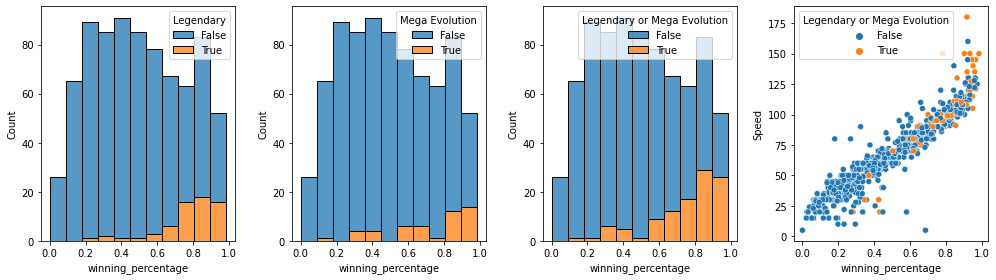

In [53]:
fig, axs= plt.subplots(1,4,figsize=(14,4))
sns.histplot(data=pokemon_adj, x='winning_percentage', hue='Legendary', ax=axs[0], multiple='stack',)
sns.histplot(data=pokemon_adj, x='winning_percentage', hue='Mega Evolution', ax=axs[1], multiple='stack',)
sns.histplot(data=pokemon_adj, x='winning_percentage', hue='Legendary or Mega Evolution', ax=axs[2], multiple='stack',)
sns.scatterplot(data=pokemon_adj, x='winning_percentage', y='Speed', hue='Legendary or Mega Evolution', ax=axs[3])
plt.tight_layout()
plt.show()

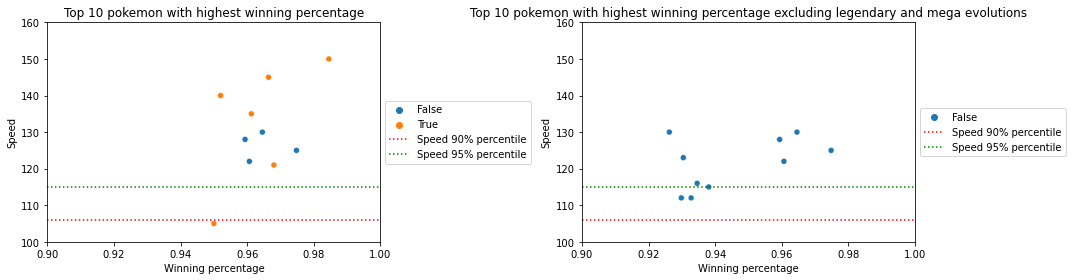

In [54]:
fig, axs= plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(data=top_10.iloc[0:10,:],x='winning_percentage',y='Speed', hue='Legendary or Mega Evolution',ax=axs[0])
axs[0].axhline(y=106.000000, label='Speed 90% percentile',c='r',linestyle='dotted')
axs[0].axhline(y=115.000000, label='Speed 95% percentile',c='g',linestyle='dotted')
axs[0].set_xlim([0.9,1])
axs[0].set_ylim([100,160])
axs[0].set_xlabel('Winning percentage')
axs[0].set_title('Top 10 pokemon with highest winning percentage')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.scatterplot(data=top_10.loc[top_10['Legendary or Mega Evolution']==False].iloc[0:10,:],x='winning_percentage',y='Speed', hue='Legendary or Mega Evolution',ax=axs[1])
axs[1].axhline(y=106.000000, label='Speed 90% percentile',c='r',linestyle='dotted')
axs[1].axhline(y=115.000000, label='Speed 95% percentile',c='g',linestyle='dotted')
axs[1].set_xlim([0.9,1])
axs[1].set_ylim([100,160])
axs[1].set_xlabel('Winning percentage')
axs[1].set_title('Top 10 pokemon with highest winning percentage excluding legendary and mega evolutions')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [55]:
# Answer 4) What's the pokemon that wins the most? What pokemon is it weakest against? What type is it weakest against?

In [56]:
# Excluding legendary or mega evolutions
top_10.loc[top_10['Legendary or Mega Evolution']==False].iloc[0,:]

#                                  513
Name                           Weavile
Type 1                            Dark
Type 2                             Ice
HP                                  70
Attack                             120
Defense                             65
Sp. Atk                             45
Sp. Def                             85
Speed                              125
Generation                           4
Legendary                        False
battles_fought                   119.0
winner_of_battles                116.0
winning_percentage             0.97479
Speed Ranking                     23.0
Winning Percent Ranking            2.0
Mega Evolution                   False
Legendary or Mega Evolution      False
Name: 512, dtype: object

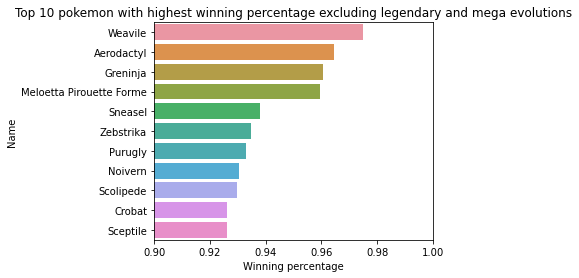

In [57]:
fig, axs= plt.subplots(figsize=(5,4))
sns.barplot(data=top_10[top_10['Legendary or Mega Evolution']==False].iloc[0:11,:], y='Name',x='winning_percentage', orient='h')
axs.set_xlim([0.9,1])
axs.set_title('Top 10 pokemon with highest winning percentage excluding legendary and mega evolutions')
axs.set_xlabel('Winning percentage')
plt.show()

In [58]:
# See if theres a specific pokemon which he is weakest against
combat.loc[((combat['First_pokemon']==513)|(combat['Second_pokemon']==513))&(combat['Winner']!=513)]

,First_pokemon,Second_pokemon,Winner,First_pokemon_type,Second_pokemon_type,Winner_pokemon_type
183,513,184,184,Dark,Poison,Poison
28780,20,513,20,Bug,Dark,Bug
36237,513,221,221,Dark,Bug,Bug


In [59]:
pokemon_adj.loc[(pokemon_adj['#']==20)|(pokemon_adj['#']==184)|(pokemon_adj['#']==221)|(pokemon_adj['#']==513)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,battles_fought,winner_of_battles,winning_percentage,Speed Ranking,Winning Percent Ranking,Mega Evolution,Legendary or Mega Evolution
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,119.0,115.0,0.966387,7.0,4.0,True,True
183,184,Crobat,Poison,Flying,85,90,80,70,80,130,2,False,122.0,113.0,0.926230,14.0,28.5,False,False
220,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False,123.0,37.0,0.300813,628.0,567.5,False,False
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,119.0,116.0,0.974790,23.0,2.0,False,False


In [60]:
# Answer 5.1) If I were up against a team of 6 pokemon, what's the likelihood of its composition?
common_pokemon.sort_values(by=['likeliness_encounter'], ascending=False).iloc[0:6,:]

,Type 1,total_of_type,total_pokemon,likeliness_encounter
17,Water,112,800,0.14000
12,Normal,98,800,0.12250
9,Grass,70,800,0.08750
0,Bug,69,800,0.08625
14,Psychic,57,800,0.07125
6,Fire,52,800,0.06500


In [61]:
# Answer 5.2) What team should I have?
type_weakness=type_combat_outcome.loc[(type_combat_outcome['type_first_pokemon']=='Water')|
        (type_combat_outcome['type_first_pokemon']=='Normal')|(type_combat_outcome['type_first_pokemon']=='Grass')|
        (type_combat_outcome['type_first_pokemon']=='Bug')|(type_combat_outcome['type_first_pokemon']=='Psychic')|
        (type_combat_outcome['type_first_pokemon']=='Fire')].groupby(
    by=['type_first_pokemon'], as_index=False).agg({'type_winning_percentage':'min'})
type_weakness.merge(type_combat_outcome,how='inner',on=['type_first_pokemon','type_winning_percentage'])

,type_first_pokemon,type_winning_percentage,type_second_pokemon,type_battles_won,type_battles_fought
0,Bug,0.210526,Flying,8,38
1,Fire,0.275862,Flying,8,29
2,Grass,0.250000,Flying,9,36
3,Normal,0.278689,Flying,17,61
4,Psychic,0.054983,Dark,16,291
5,Water,0.235294,Flying,16,68


In [62]:
# Analisis excluding flying type because theres only 4 pokemon
type_weakness=type_combat_outcome.loc[(((type_combat_outcome['type_first_pokemon']=='Water')|
        (type_combat_outcome['type_first_pokemon']=='Normal')|(type_combat_outcome['type_first_pokemon']=='Grass')|
        (type_combat_outcome['type_first_pokemon']=='Bug')|(type_combat_outcome['type_first_pokemon']=='Psychic')
                                       |(type_combat_outcome['type_first_pokemon']=='Fire'))&
        (type_combat_outcome['type_second_pokemon']!='Flying'))].groupby(
    by=['type_first_pokemon'], as_index=False).agg({'type_winning_percentage':'min'})
type_weakness.merge(type_combat_outcome,how='inner',on=['type_first_pokemon','type_winning_percentage'])

,type_first_pokemon,type_winning_percentage,type_second_pokemon,type_battles_won,type_battles_fought
0,Bug,0.266385,Electric,126,473
1,Fire,0.400612,Electric,131,327
2,Grass,0.277108,Dark,92,332
3,Normal,0.381657,Electric,258,676
4,Psychic,0.054983,Dark,16,291
5,Water,0.284247,Dragon,166,584


In [63]:
1-type_weakness['type_winning_percentage'].mean()

0.7225014949186097

In [64]:
# Answer 6) If I were to play pokemon, which type of pokemon should I start with?
# When you are staring playing the game your alwyas given a starter pokemon that you choose between 3 differnt types:
# Water, Fire and Grass
w_type_expectedvalue.loc[(w_type_expectedvalue['type_first_pokemon']=='Fire')|(w_type_expectedvalue['type_first_pokemon']=='Water')
                        |(w_type_expectedvalue['type_first_pokemon']=='Grass')]

,type_first_pokemon,expected_winning_percentage,total_of_type
6,Fire,0.611615,52
17,Water,0.537384,112
9,Grass,0.482081,70


**4) Results**

In order to answer the questions asked at the beginning of the project we had to combine both datasets in order for them to be useful, but first we had to understand both of them. 

After doing an initial exploratory data analysis on the pokemon dataset the following was clear. First the shape of the dataset, which was made of 12 features and 800 rows, didn't have any duplicates in the dataset and only 1 feature of the 12 had missing values, this feature was ‘Type 2 with 386 missing values being 48.25% of all the feature values. These missing values were not missing at random but on purpose, because when you research about the pokemon game you realize that not all pokemon have two types but most of them are strictly one type. Second, all features were properly marked, there was no numerical feature as a data type of non-numerical or vice versa. Third, there weren't any features with a correlation higher than 0.75, the highest one was the relation between ‘Defense’ and ‘Sp. Def’ with a correlation of 0.51, letting us know that the dataset didn't have a strong relation between any two features.. 

The same was done for the combat dataset, which was made of 3 features and 50,000 rows. Unlike the pokemon dataset the combat dataset had 1,952 duplicates, pokemon can battle multiple times between them so it makes sense to leave the duplicates in the dataset. This dataset only displayed battle outcomes using pokemon id’s.

When joining together both dataset the resulting dataset had the information necessary to build features such as winning percentage per pokemon, expected value of winning percentage per type of pokemon, total battles won per pokemon, total battles fought per pokemon and others.

The first question answered was ‘What's the type of the most common pokemon?’. Once the df was grouped by ’Type 1’ the results showed that the water type pokemon was the most common in the pokemon universe. From the 800 possible pokemon you can encounter 112 where ‘Type 1’ water, having a 14% chance of encountering a water type pokemon as an adventurer in the pokemon world .The least common ‘Type 1’ pokemon is the flying type, there's only 4 flying ‘Type 1’ pokemon, 2 of them are legendary. There's a 0.5% chance as an adventure in the pokemon world of encountering a flying ‘Type 1’ pokemon and if you adjust for the fact that legendary pokemon cannot appear in the wild the chance of encountering a flying ‘Type 1’ is 0.25%. My recommendation for a new player to pokemon would be to adjust his team to have at least one pokemon with the highest winning percentage ratio against a water type. Another recommendation would be to not incorporate a pokemon to win against a ‘Type 1’ flying type due to the fact that it is highly unlikely you'll encounter one of these. The players should solve for pokemons that are good matchups against other types with higher probability of appearance. This recommendation is made trying to maximize the highest number of battles a player can win with the disclosure that if a flying type would appear you would have a disadvantage against this matchup.
 

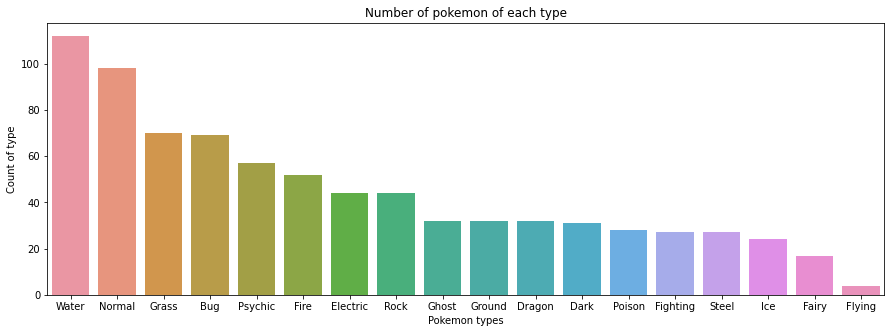

In [65]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Number of pokemon of each type')
sns.barplot(data=common_pokemon, x='Type 1' ,y='total_of_type')
ax.set_xlabel('Pokemon types')
ax.set_ylabel('Count of type')
plt.show()

The second question answered was, ‘Which pokemon type wins the most battles? What is it weakest against?’. Answering this question was tricky because after replacing pokemon ids for corresponding ‘Type 1’ in the combat dataset, when you use python library pandas grouping by function, ‘Bug vs. Dark’ would be different from ‘Dark vs. Bug’ and for the case of the analisis it should be the same. For this question to be answered we had to create a new dataframe writing a code that independently of order when two ‘Types 1’ fought this would add to a dictionary which its key would be the total number a battle every ‘Type 1’ fought, which value would be the number it won. With the new dataframe you could see that flying ‘Type 1’ was the type that had the highest winning percentage expected value at 75.87%. Having said this and as mentioned earlier, there's only 4 flying ‘Type 1’ pokemon, once you exclude legendary pokemon there's only a 0.25% chance that you would encounter one of these not being practical advice for a new player to build his team assuming that he will capture a flying ‘Type 1’ pokemon early in the game or that he is going to fight commonly against teams with these pokemons. On the other hand the ‘Type 1’ that has the second highest winning percentage expected value is electric types at 65.5%. Electric ‘Type 1’ have a higher chance of appearance in the game of pokemon with a 5.5% likelihood of encounter, 22x more than ‘Type 1’ flying types. Electric pokemon are more common than flying pokemon and easier to catch at the beginning of the game, making more sense to aspire to incorporate one of these to your team than flying types. Once you add electric ‘Type 1’ to your team you should be aware that electric types are the weakest against ground ‘Type 1’ pokemons, electric pokemon tend to win only 9.6% of the time against ground type. My recommendation should be that new players early on the game should aim to capture an electric type and make them their strongest pokemon in their team, the player should also aim to have a pokemon that have a decente winning percentage against ground type to solve for the electric type pokemon weaknesses against ground.

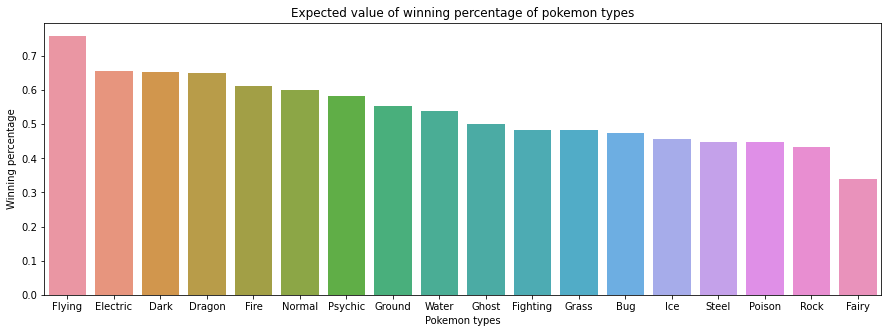

In [66]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Expected value of winning percentage of pokemon types')
sns.barplot(data=w_type_expectedvalue, x='type_first_pokemon',y='expected_winning_percentage')
ax.set_xlabel('Pokemon types')
ax.set_ylabel('Winning percentage')
plt.show()

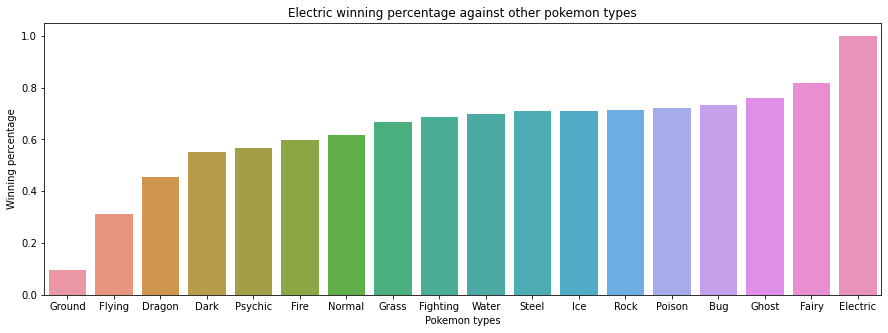

In [67]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Electric winning percentage against other pokemon types')
sns.barplot(data=electric_against_types, x='type_second_pokemon',y='type_winning_percentage')
ax.set_xlabel('Pokemon types')
ax.set_ylabel('Winning percentage')
plt.show()

So far we have covered the most common ’Type 1’ pokemon and strongest ’Type 1’ pokemon. The third question answered was, ‘What's the best rounded pokemon?’. Once you add the feature of ‘winning percentage’ to the initial pokemon dataset dataframe and look at correlations between features, the data shows that speed and winning percentage have a strong linear relation with a correlation of 0.94. Higher speed values in pokemon are associated with higher winning percentages. At this point we have recommended that a new player should aim for a ‘Type 1’ electric pokemon early in the game due to its highest winning percentage, but not any type of electric pokemon but an electric pokemon in the top percentile in the speed category. 

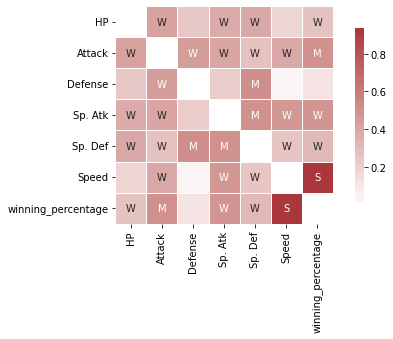

In [68]:
# Create labels for the correlation matrix
labels = np.where(np.abs(pokemon_adj_corr)>0.75, "S",
                  np.where(np.abs(pokemon_adj_corr)>0.5, "M",
                           np.where(np.abs(pokemon_adj_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(pokemon_adj_corr, mask=np.eye(len(pokemon_adj_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

Taking a closer look at the top pokemon with the highest winning percentage, 6/10 were either legendary or mega evolutions, in the pokemon game you cannot capture either of this in the wild, only under special circumstances, which a new player will not know right away. If you where to analisis the top 10 pokemon including legendary and mega evolution you'll notice that 9/10 of this pokemon are in the top 5 percentile of pokemon with the best speed attributes, but because this pokemon aren't available easily, a recommendation involving this pokemon wouldn't make sense. The practical thing to do would be to go for pokemon that can appear in the wild and are easier to catch. Once you exclude mega evolutions and legendary and analis the top 10 pokemon you could actually catch, 3/10 of this pokemon were in the top 10 percentile and 7/10 of this pokemon were in the top 5 percentile of pokemon with the highest speed attribute.

Concluding that high winning percentages are related with tops marks in pokemon speed attribute, best rounded pokemon are those with the higher speed attributes. My recommendation would be to aim that all your pokemon in your team have high marks regarding speed.



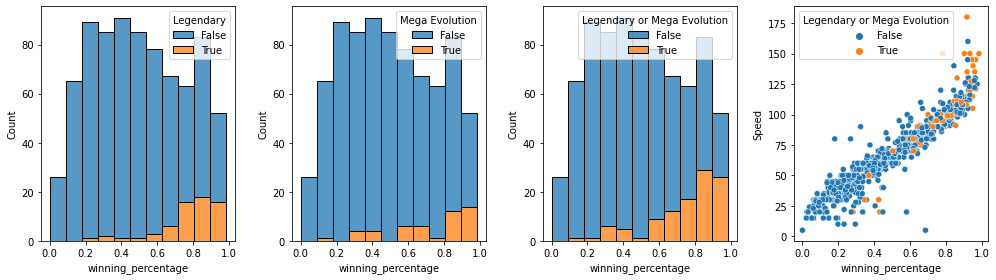

In [69]:
fig, axs= plt.subplots(1,4,figsize=(14,4))
sns.histplot(data=pokemon_adj, x='winning_percentage', hue='Legendary', ax=axs[0], multiple='stack',)
sns.histplot(data=pokemon_adj, x='winning_percentage', hue='Mega Evolution', ax=axs[1], multiple='stack',)
sns.histplot(data=pokemon_adj, x='winning_percentage', hue='Legendary or Mega Evolution', ax=axs[2], multiple='stack',)
sns.scatterplot(data=pokemon_adj, x='winning_percentage', y='Speed', hue='Legendary or Mega Evolution', ax=axs[3])
plt.tight_layout()
plt.show()

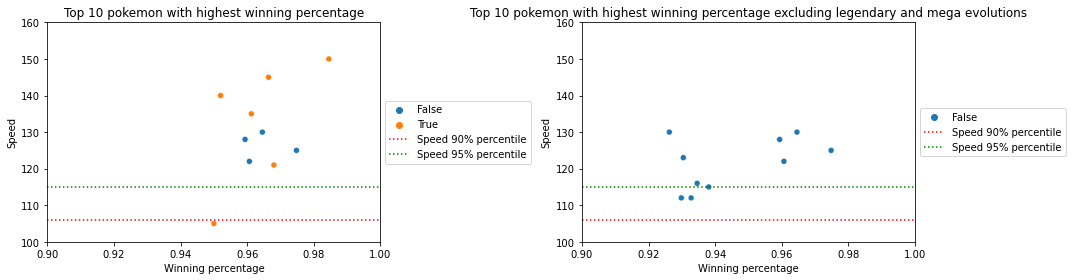

In [70]:
fig, axs= plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(data=top_10.iloc[0:10,:],x='winning_percentage',y='Speed', hue='Legendary or Mega Evolution',ax=axs[0])
axs[0].axhline(y=106.000000, label='Speed 90% percentile',c='r',linestyle='dotted')
axs[0].axhline(y=115.000000, label='Speed 95% percentile',c='g',linestyle='dotted')
axs[0].set_xlim([0.9,1])
axs[0].set_ylim([100,160])
axs[0].set_xlabel('Winning percentage')
axs[0].set_title('Top 10 pokemon with highest winning percentage')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.scatterplot(data=top_10.loc[top_10['Legendary or Mega Evolution']==False].iloc[0:10,:],x='winning_percentage',y='Speed', hue='Legendary or Mega Evolution',ax=axs[1])
axs[1].axhline(y=106.000000, label='Speed 90% percentile',c='r',linestyle='dotted')
axs[1].axhline(y=115.000000, label='Speed 95% percentile',c='g',linestyle='dotted')
axs[1].set_xlim([0.9,1])
axs[1].set_ylim([100,160])
axs[1].set_xlabel('Winning percentage')
axs[1].set_title('Top 10 pokemon with highest winning percentage excluding legendary and mega evolutions')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

The fourth question answered was, ‘What's the pokemon that wins the most? What pokemon is it weakest against? What type is it weakest against?’. Once you exclude legendary and mega evolution pokemon you're left with the pokemon that you could actually catch in the game. The pokemon that wins the most was pokemon 514 which is Weavile, a ‘Type 1’ dark pokemon. This pokemon winning percentage is 97.47% and its speed is 125, being in the top 5% of pokemons with the highest speed values.

This pokemon is not particularly weak against any type of pokemon because when you look at the battles it has lost, it has only lost 3 battles against 3 different pokemon. Of those pokemon ⅔ are in the top 10% of pokemon with highest speed attributes, one of them being a mega evolution. The other battle it lost I wouldn't mind saying that it was by chance because the winning percentage of the pokemon it lost against isn't particula high, having a 30.1% winning percentage, and being in the 20 percentile of the speed attribute which is the lower end. The recommendation for a new pokemon player would be to have Weavile in his team.



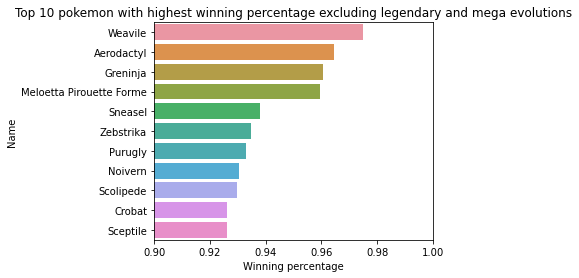

In [71]:
fig, axs= plt.subplots(figsize=(5,4))
sns.barplot(data=top_10[top_10['Legendary or Mega Evolution']==False].iloc[0:11,:], y='Name',x='winning_percentage', orient='h')
axs.set_xlim([0.9,1])
axs.set_title('Top 10 pokemon with highest winning percentage excluding legendary and mega evolutions')
axs.set_xlabel('Winning percentage')
plt.show()

The fifth question answered was, ‘If I were up against a team of 6 pokemon, what's the likelihood of its composition? What team should I have?’. For this question we used the probability of each pokemon appearing in the wild assuming once a ‘Type 1’ appears it will not appear again. Having said this, the pokemon team you would go against would be water, normal, grass, bug, psychic, fire order by likeness of appearance in descending order. To win this matchup you should go for a ‘Type 1’ team made of flying, flying, flying, flying,dark, flying in corresponding order, which is the ‘Type 1’ that each type mentioned is the weakest against. Since there's only a 0.5% chance that in a pokemon game you would battle against a ‘Type 1’ flying type, once you exclude flying from the team compositions options, to beat a water, normal, grass, bug, psychic, fire you should have a team made up of dragon, electric, dark, electric, dark, electric giving you a 72.3% chance of winning the matchup. In general my recommendation would be to aim for a team built of a dragon, electric, dark, electric, dark, electric ‘Type 1’ pokemons.

In [72]:
type_weakness=type_combat_outcome.loc[(((type_combat_outcome['type_first_pokemon']=='Water')|
        (type_combat_outcome['type_first_pokemon']=='Normal')|(type_combat_outcome['type_first_pokemon']=='Grass')|
        (type_combat_outcome['type_first_pokemon']=='Bug')|(type_combat_outcome['type_first_pokemon']=='Psychic')
                                       |(type_combat_outcome['type_first_pokemon']=='Fire'))&
        (type_combat_outcome['type_second_pokemon']!='Flying'))].groupby(
    by=['type_first_pokemon'], as_index=False).agg({'type_winning_percentage':'min'})
type_weakness.merge(type_combat_outcome,how='inner',on=['type_first_pokemon','type_winning_percentage'])

,type_first_pokemon,type_winning_percentage,type_second_pokemon,type_battles_won,type_battles_fought
0,Bug,0.266385,Electric,126,473
1,Fire,0.400612,Electric,131,327
2,Grass,0.277108,Dark,92,332
3,Normal,0.381657,Electric,258,676
4,Psychic,0.054983,Dark,16,291
5,Water,0.284247,Dragon,166,584


The sixth question answered was, ‘If I were to play pokemon, which type of pokemon should I start with?’. When you play pokemon you are presented with the option of starting the game with a ‘Type 1’ water, fire or grass pokemon. Based on the winning percentage of each type you should start the game with a Fire pokemon which has a winning percentage of 61.1% vs. 53.7% of a Water type or 48.2% of a Grass type.